## Carga de librerías

In [2]:
import pandas as pd
from sklearn.impute import KNNImputer
import datetime  
from pandas.errors import OutOfBoundsDatetime
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import numpy as np







## Cargar todos los 6 datasets

In [3]:
# Cargar los datos
df_london = pd.read_csv(r"C:\Users\Administrator\Documents\ProyectoAirBnB\airbnb_grupo1\data\london_airbnb.csv")
df_madrid = pd.read_csv(r"C:\Users\Administrator\Documents\ProyectoAirBnB\airbnb_grupo1\data\madrid_airbnb.csv")
df_milan = pd.read_csv(r"C:\Users\Administrator\Documents\ProyectoAirBnB\airbnb_grupo1\data\milan_airbnb.csv")
df_ny = pd.read_csv(r"C:\Users\Administrator\Documents\ProyectoAirBnB\airbnb_grupo1\data\NY_airbnb.csv")
df_sydney = pd.read_csv(r"C:\Users\Administrator\Documents\ProyectoAirBnB\airbnb_grupo1\data\sydney_airbnb.csv")
df_tokyo = pd.read_csv(r"C:\Users\Administrator\Documents\ProyectoAirBnB\airbnb_grupo1\data\tokyo_airbnb.csv")


num_filas_london = df_london.shape[0]
print("Número de filas en el dataset London:", num_filas_london)

num_filas_madrid = df_madrid.shape[0]
print("Número de filas en el dataset Madrid:", num_filas_madrid)

num_filas_milan = df_milan.shape[0]
print("Número de filas en el dataset Milan:", num_filas_milan)

num_filas_ny = df_ny.shape[0]
print("Número de filas en el dataset NY:", num_filas_ny)

num_filas_sydney = df_sydney.shape[0]
print("Número de filas en el dataset Sydney:", num_filas_sydney)

num_filas_tokyo = df_tokyo.shape[0]
print("Número de filas en el dataset Tokyo:", num_filas_tokyo)



Número de filas en el dataset London: 85068
Número de filas en el dataset Madrid: 19618
Número de filas en el dataset Milan: 18322
Número de filas en el dataset NY: 48895
Número de filas en el dataset Sydney: 36662
Número de filas en el dataset Tokyo: 11466


## Concatenar los 6 datasets

In [4]:
# Agregar una columna 'city' para identificar la ciudad de origen en cada dataset
df_london['city'] = 'London'
df_madrid['city'] = 'Madrid'
df_milan['city'] = 'Milan'
df_ny['city'] = 'New York'
df_sydney['city'] = 'Sydney'
df_tokyo['city'] = 'Tokyo'

# Concatenar los datasets en uno solo
df_all = pd.concat([df_london, df_madrid, df_milan, df_ny, df_sydney, df_tokyo], ignore_index=True)

# Verificar la concatenación
print(df_all.head())
print("Número total de filas:", len(df_all))
# Guardar dataset como CSV
df_all.to_csv('df_all.csv', index=False)


      id                                               name  host_id  \
0  11551         Arty and Bright London Apartment in Zone 2    43039   
1  13913                Holiday London DB Room Let-on going    54730   
2  90700                  Sunny Notting Hill flat & terrace   491286   
3  15400                Bright Chelsea  Apartment. Chelsea!    60302   
4  92399  MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...   497366   

       host_name neighbourhood_group           neighbourhood  latitude  \
0        Adriano                 NaN                 Lambeth  51.46225   
1          Alina                 NaN               Islington  51.56802   
2           Chil                 NaN  Kensington and Chelsea  51.51074   
3       Philippa                 NaN  Kensington and Chelsea  51.48796   
4  Andrea & Mark                 NaN               Islington  51.55071   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0   -0.11732  Entire home/apt     88           

## Conversión monetaria para las ciudades de London, New York, Sydney y Tokio

In [5]:
# Supongamos los siguientes tipos de cambio:
yen_to_euro = 0.0063           # 1 yen = 0.0063 euros
aud_to_euro = 0.60             # 1 dólar australiano = 0.60 euros
gbp_to_euro = 1.16             # 1 libra = 1.16 euros
usd_to_euro = 0.95             # 1 dólar = 0.95 euros

# Aplicar los cambios de moneda basados en la ciudad
df_all['price_eur'] = df_all.apply(
    lambda row: row['price'] * yen_to_euro if row['city'] == 'Tokyo' else
                row['price'] * aud_to_euro if row['city'] == 'Sydney' else
                row['price'] * gbp_to_euro if row['city'] == 'London' else
                row['price'] * usd_to_euro if row['city'] == 'New York' else
                row['price'],  # Mantenemos el precio en euros si ya está en esa moneda
    axis=1
)

# Verificar las primeras filas después de la conversión
print(df_all[['city', 'price', 'price_eur']].head())


     city  price  price_eur
0  London     88     102.08
1  London     65      75.40
2  London    105     121.80
3  London    100     116.00
4  London     77      89.32


## Información general del dataset

In [6]:
# Información general del dataframe
print(df_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              220031 non-null  int64  
 1   name                            219964 non-null  object 
 2   host_id                         220031 non-null  int64  
 3   host_name                       219325 non-null  object 
 4   neighbourhood_group             68513 non-null   object 
 5   neighbourhood                   220031 non-null  object 
 6   latitude                        220031 non-null  float64
 7   longitude                       220031 non-null  float64
 8   room_type                       220031 non-null  object 
 9   price                           220031 non-null  int64  
 10  minimum_nights                  220031 non-null  int64  
 11  number_of_reviews               220031 non-null  int64  
 12  last_review     

## Analizar valores repetidos

In [7]:
# Verificar filas duplicadas en el DataFrame
duplicated_rows = df_all[df_all.duplicated()]

# Mostrar filas duplicadas
print(duplicated_rows)
print("Número total de filas duplicadas:", len(duplicated_rows))


Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, city, price_eur]
Index: []
Número total de filas duplicadas: 0


## Analizar datos nulos

In [8]:
# Ver la cantidad de valores nulos en cada columna
print(df_all.isnull().sum())
# Porcentaje de valores nulos en cada columna
porcentaje_nulos = df_all.isnull().mean() * 100
print(porcentaje_nulos)

id                                     0
name                                  67
host_id                                0
host_name                            706
neighbourhood_group               151518
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        54371
reviews_per_month                  54371
calculated_host_listings_count     11466
availability_365                   11466
city                                   0
price_eur                              0
dtype: int64
id                                 0.000000
name                               0.030450
host_id                            0.000000
host_name                          0.320864
neighbourhood_group               68.862115
neighbourhood                

## Valores nulos por ciudad

In [10]:
# Lista de ciudades a analizar
ciudades = ["Sydney", "Madrid", "New York", "Tokyo", "London", "Milan"]

# Filtrar valores nulos por ciudad y variable
nulos_por_ciudad = {}

for ciudad in ciudades:
    # Filtrar filas que correspondan a la ciudad
    df_ciudad = df_all[df_all['city'] == ciudad]
    # Calcular la suma de valores nulos por columna
    nulos_por_ciudad[ciudad] = df_ciudad.isnull().sum()

# Crear un DataFrame con el resultado
df_nulos_por_ciudad = pd.DataFrame(nulos_por_ciudad)

# Visualizar los nulos por ciudad y variable
print("Valores nulos por ciudad y variable:")
print(df_nulos_por_ciudad)

# Número total de registros en el dataset df_all
total_registros = df_all.shape[0]
print("Número total de registros en el dataset df_all:", total_registros)

# Número total de registros por ciudad
registros_por_ciudad = df_all.groupby('city').size().reset_index(name='total_registros')

# Mostrar el número total de registros por ciudad
print("Número total de registros por ciudad:")
for index, row in registros_por_ciudad.iterrows():
    print(f"Ciudad: {row['city']} - Total de registros: {row['total_registros']}")






Valores nulos por ciudad y variable:
                                Sydney  Madrid  New York  Tokyo  London  Milan
id                                   0       0         0      0       0      0
name                                12       3        16      0      26     10
host_id                              0       0         0      0       0      0
host_name                            6     527        21     16      12    124
neighbourhood_group              36662       0         0  11466   85068  18322
neighbourhood                        0       0         0      0       0      0
latitude                             0       0         0      0       0      0
longitude                            0       0         0      0       0      0
room_type                            0       0         0      0       0      0
price                                0       0         0      0       0      0
minimum_nights                       0       0         0      0       0      0
number_of_revie

## Imputar valores nulos en las columnas reviews_per_month, calculated_host_listings_count, availability_365 usando el método de K-Nearest Neighbors (KNN)

In [11]:
# Seleccionar las columnas que necesitan imputación (sin incluir 'last_review')
columns_to_impute = ['reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df_impute = df_all[columns_to_impute].copy()

# Aplicar KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_impute)

# Convertir de nuevo a DataFrame y restaurar los nombres de columnas
df_imputed = pd.DataFrame(df_imputed, columns=columns_to_impute)

# Reemplazar las columnas originales en df_all con las imputadas
df_all[columns_to_impute] = df_imputed[columns_to_impute]

# Verificar el resultado
print(df_all[columns_to_impute].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 3 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   reviews_per_month               220031 non-null  float64
 1   calculated_host_listings_count  220031 non-null  float64
 2   availability_365                220031 non-null  float64
dtypes: float64(3)
memory usage: 5.0 MB
None


## Ver valores nulos nuevamente

In [47]:
# Lista de ciudades a analizar
ciudades = ["Sydney", "Madrid", "New York", "Tokyo", "London", "Milan"]

# Filtrar valores nulos por ciudad y variable
nulos_por_ciudad = {}

for ciudad in ciudades:
    # Filtrar filas que correspondan a la ciudad
    df_ciudad = df_all[df_all['city'] == ciudad]
    # Calcular la suma de valores nulos por columna
    nulos_por_ciudad[ciudad] = df_ciudad.isnull().sum()

# Crear un DataFrame con el resultado
df_nulos_por_ciudad = pd.DataFrame(nulos_por_ciudad)

# Visualizar los nulos por ciudad y variable
print("Valores nulos por ciudad y variable:")
print(df_nulos_por_ciudad)

# Número total de registros en el dataset df_all
total_registros = df_all.shape[0]
print("Número total de registros en el dataset df_all:", total_registros)

# Número total de registros por ciudad
registros_por_ciudad = df_all.groupby('city').size().reset_index(name='total_registros')

# Mostrar el número total de registros por ciudad
print("Número total de registros por ciudad:")
for index, row in registros_por_ciudad.iterrows():
    print(f"Ciudad: {row['city']} - Total de registros: {row['total_registros']}")

Valores nulos por ciudad y variable:
                                Sydney  Madrid  New York  Tokyo  London  Milan
id                                   0       0         0      0       0      0
name                                12       3        16      0      26     10
host_id                              0       0         0      0       0      0
host_name                            6     527        21     16      12    124
neighbourhood_group              36653       0         0  11462   85050  18322
neighbourhood                        0       0         0      0       0      0
latitude                             0       0         0      0       0      0
longitude                            0       0         0      0       0      0
room_type                            0       0         0      0       0      0
price                                0       0         0      0       0      0
minimum_nights                       0       0         0      0       0      0
number_of_revie

## Valores únicos en la columna calculated_host_listings_count

In [48]:
unique_values_count = df_all['calculated_host_listings_count'].nunique()
print(f"Cantidad de valores únicos en 'calculated_host_listings_count': {unique_values_count}")


Cantidad de valores únicos en 'calculated_host_listings_count': 209


## Estadísticas para la columna calculated_host_listings_count

In [49]:
estadisticas = df_all['calculated_host_listings_count'].describe()
print(estadisticas)

count    219981.000000
mean         13.936609
std          73.260522
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         999.000000
Name: calculated_host_listings_count, dtype: float64


## Distribución de número de alojamientos por grupo considerando la columna calculated_host_listings_count

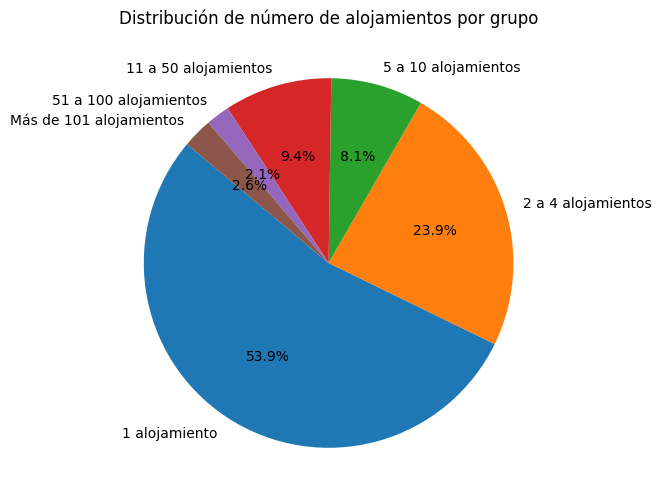

In [50]:
# Crear los grupos según los rangos especificados, incluyendo el nuevo rango
bins = [0, 1, 4, 10, 50, 100, float('inf')]
labels = ['1 alojamiento', '2 a 4 alojamientos', '5 a 10 alojamientos', '11 a 50 alojamientos', '51 a 100 alojamientos', 'Más de 101 alojamientos']
df_all['host_listing_group'] = pd.cut(df_all['calculated_host_listings_count'], bins=bins, labels=labels, right=True)

# Contar la frecuencia de cada grupo
group_counts = df_all['host_listing_group'].value_counts().sort_index()

# Graficar el gráfico de tarta
plt.figure(figsize=(8, 6))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de número de alojamientos por grupo')
plt.show()




## Precio vs número de reseñas

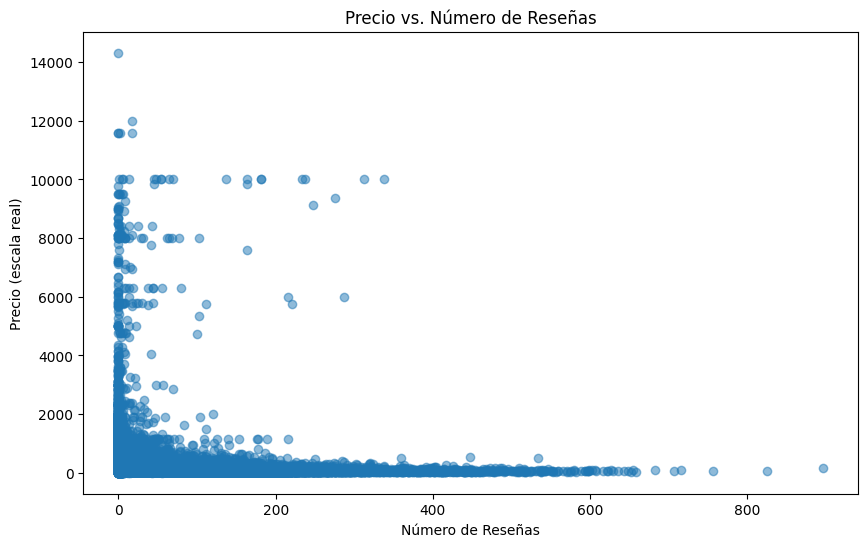

In [67]:

plt.figure(figsize=(10, 6))
plt.scatter(df_all['number_of_reviews'], df_all['price_eur'], alpha=0.5)
plt.title('Precio vs. Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio (escala real)')

plt.show()



## Número de listings por host vs número de reseñas

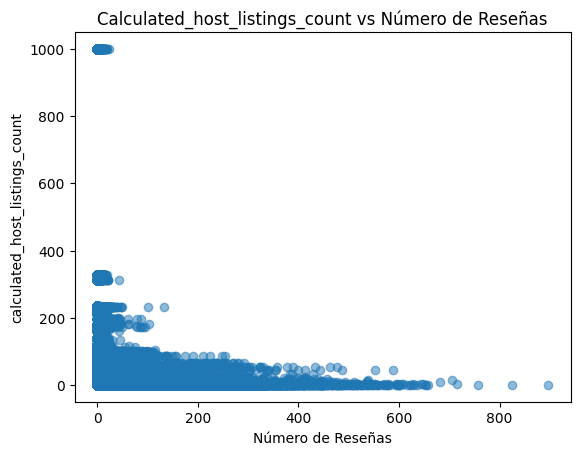

In [68]:
plt.scatter(df_all['number_of_reviews'], df_all['calculated_host_listings_count'], alpha=0.5)
plt.title('Calculated_host_listings_count vs Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('calculated_host_listings_count')
plt.show()


## Gráfica de los frecuencia de "noches mínimas" de estadía 

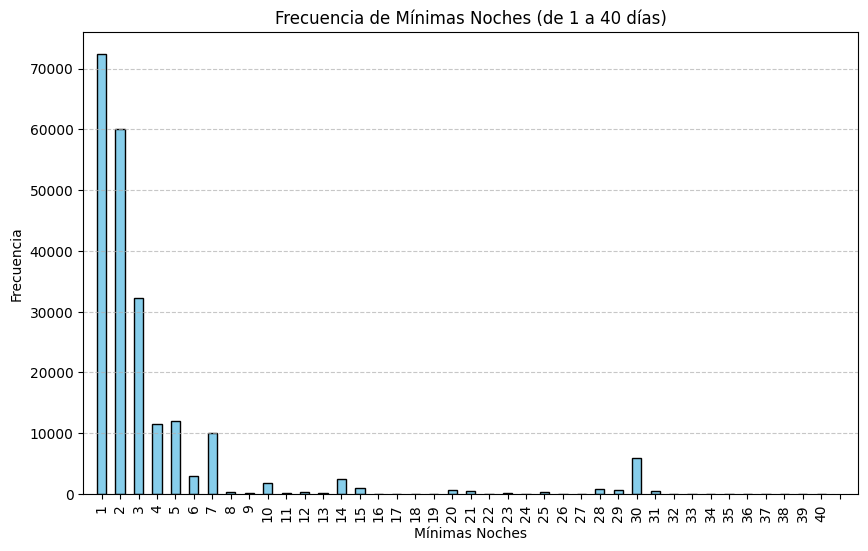

In [121]:
# Contar la frecuencia de cada valor único en la columna 'minimum_nights'
minimum_nights_counts = df_all['minimum_nights'].value_counts()

# Filtrar para mostrar solo los días entre 1 y 40
minimum_nights_counts = minimum_nights_counts[(minimum_nights_counts.index >= 1) & (minimum_nights_counts.index <= 40)]

# Graficar los valores únicos vs. mínimas noches
plt.figure(figsize=(10, 6))
minimum_nights_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de Mínimas Noches (de 1 a 40 días)')
plt.xlabel('Mínimas Noches')
plt.ylabel('Frecuencia')

# Ajustar los ticks del eje X para que aparezcan de 0 a 40 en incrementos de 5
x_ticks = range(0, 41, 1)  # Cambiar el rango para que muestre de 0 a 40 cada 5 días
plt.xticks(x_ticks)  # Asegurarse de que se muestren los ticks deseados

# Asegúrate de que el eje X muestre todos los valores hasta 40
plt.xlim(-1, 41)  # Ajustar límites del eje X para incluir 0 y 40

# Añadir una línea para los ticks no presentes
plt.gca().set_xticks(x_ticks)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()




## Estadísticas descriptivas para las variables numéricas

In [53]:
# Mostrar estadísticas descriptivas para las columnas numéricas
statistics = df_all.describe()

# Mostrar el resultado
print(statistics)


                 id       host_id       latitude      longitude         price  \
count  2.199810e+05  2.199810e+05  219981.000000  219981.000000  2.199810e+05   
mean   2.240789e+07  8.494005e+07      32.573472      16.426981  9.180243e+02   
std    1.175551e+07  8.856128e+07      30.144701      76.029481  8.286147e+03   
min    2.539000e+03  1.944000e+03     -34.135212     -74.244420  1.000000e+00   
25%    1.338079e+07  1.439583e+07      40.412620      -3.705870  5.500000e+01   
50%    2.250217e+07  4.640216e+07      40.794280      -0.128380  9.900000e+01   
75%    3.155479e+07  1.414998e+08      51.496190       9.199530  1.770000e+02   
max    5.095505e+07  4.117208e+08      51.681690     151.339811  1.000046e+06   

       minimum_nights  number_of_reviews  reviews_per_month  \
count   219981.000000      219981.000000      219981.000000   
mean         5.258450          20.128970           1.145277   
std         20.120264          43.014204           1.398337   
min          1.000

## Contar los ceros en la columna 'price'

In [54]:
# Contar los ceros en la columna 'price'
zero_price_counts = (df_all['price'] == 0).sum()
print(f"Número de ceros en la columna 'price': {zero_price_counts}")


Número de ceros en la columna 'price': 0


## Eliminar filas con valores de cero en la columna price

In [55]:
# Eliminar las filas donde hay ceros en la columna 'price'
df_all = df_all[df_all['price'] != 0]

# Opcional: Mostrar la forma del DataFrame después de la eliminación
print(f"Número de filas después de eliminar ceros en 'price': {df_all.shape[0]}")


Número de filas después de eliminar ceros en 'price': 219981


## Estadísticas descriptivas de la columna precios

In [56]:
# Estadísticas descriptivas de precios
price_statistics = df_all['price'].describe()

# Conteo de cada tipo de habitación
room_type_counts = df_all['room_type'].value_counts()

# Mostrar los resultados
print("Estadísticas de precios:")
print(price_statistics)
print("\nConteo de tipos de habitación:")
print(room_type_counts)


Estadísticas de precios:
count    2.199810e+05
mean     9.180243e+02
std      8.286147e+03
min      1.000000e+00
25%      5.500000e+01
50%      9.900000e+01
75%      1.770000e+02
max      1.000046e+06
Name: price, dtype: float64

Conteo de tipos de habitación:
room_type
Entire home/apt    128139
Private room        86489
Shared room          4008
Hotel room           1345
Name: count, dtype: int64


## Cambiar la columna availability_365 de float de integer

In [37]:
# Cambiar el tipo de la columna 'availability_365' a entero
df_all['availability_365'] = df_all['availability_365'].astype(int)

# Verificar el cambio de tipo
print(df_all['availability_365'].dtype)


int64


## Gráfico de cajas y bigotes de precios por ciudad

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\3249487738.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='city', y='price_eur', palette='viridis')


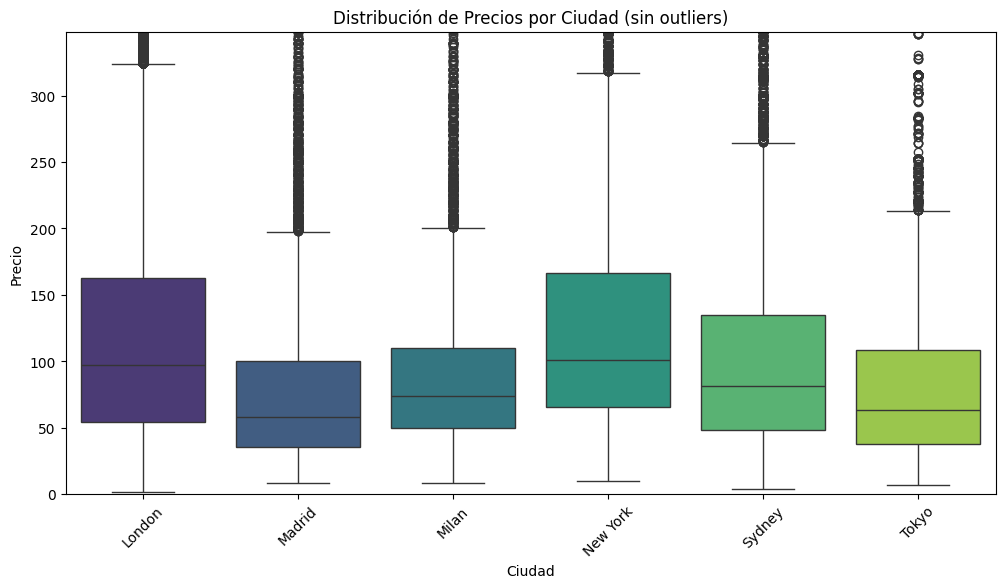

In [57]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear diagrama de caja (boxplot)
sns.boxplot(data=df_all, x='city', y='price_eur', palette='viridis')

# Limitar el eje y para evitar la influencia de outliers
plt.ylim(0, df_all['price_eur'].quantile(0.95))  # Limitar hasta el percentil 95 de 'price'

# Personalizar el gráfico
plt.title("Distribución de Precios por Ciudad (sin outliers)")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)  # Rotación de etiquetas para facilitar la lectura

plt.show()


Vemos que hay muchos outliers. Los consideramos como propiedades de lujo.

## Precio promedio por ciudad de todo el dataframe (considerando outliers)

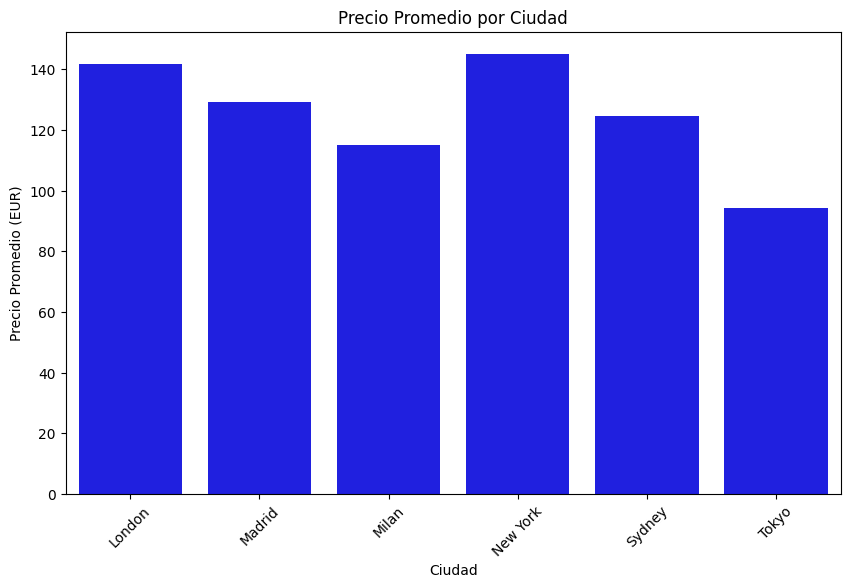

In [58]:
# Calcular el precio promedio por ciudad
avg_price_per_city = df_all.groupby('city')['price_eur'].mean().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear gráfico de barras
sns.barplot(data=avg_price_per_city, x='city', y='price_eur', color='blue')
plt.title("Precio Promedio por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Precio Promedio (EUR)")
plt.xticks(rotation=45)  # Rotación de etiquetas para facilitar la lectura

plt.show()



## Distribución de precios de todo el dataframe (considerando outliers)


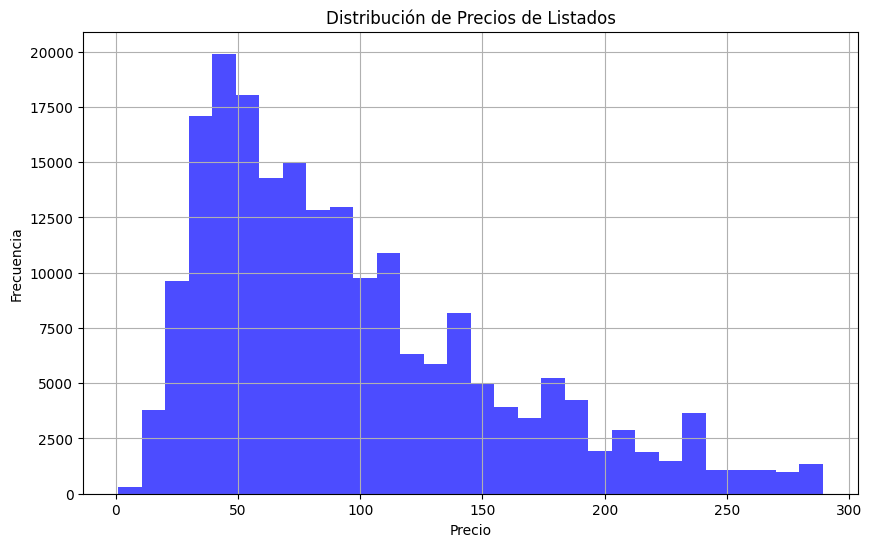

In [162]:
plt.figure(figsize=(10, 6))
plt.hist(df_regular['price_eur'], bins=30, color='blue', alpha=0.7)
plt.title('Distribución de Precios de Listados')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


## División del dataset entre propiedades estándar y propiedades de lujo

In [70]:
#Definir el umbral de los precios de las propiedades de lujo

# Calcular los cuartiles y el IQR
Q1 = df_all['price_eur'].quantile(0.25)
Q3 = df_all['price_eur'].quantile(0.75)
IQR = Q3 - Q1 #cálculo del rango intercuartílico

# Definir el umbral de lujo (por ejemplo, precios que superan Q3 + 1.5*IQR)
luxury_threshold = Q3 + 1.5 * IQR

# Crear subconjuntos de datos
df_luxury = df_all[df_all['price_eur'] > luxury_threshold]
df_regular = df_all[df_all['price_eur'] <= luxury_threshold]



## Guardar el dataset completo sin divisiones como csv

In [167]:
df_all.to_csv('df_all_limpio.csv', index=False)


## Análisis de Propiedades de Lujo

Estadísticas de propiedades de lujo:
                 id       host_id      latitude     longitude         price  \
count  1.603300e+04  1.603300e+04  16033.000000  16033.000000  1.603300e+04   
mean   2.422191e+07  9.254618e+07     32.492297     14.749106  2.721238e+03   
std    1.144286e+07  9.019223e+07     31.293779     73.685730  2.807908e+04   
min    1.539600e+04  4.775000e+03    -34.085372    -74.202950  2.500000e+02   
25%    1.569703e+07  1.722814e+07     40.431120     -3.695420  3.250000e+02   
50%    2.599794e+07  5.038563e+07     45.457550     -0.163570  4.500000e+02   
75%    3.434992e+07  1.561588e+08     51.506180      9.157510  7.000000e+02   
max    5.093410e+07  4.021909e+08     51.663610    151.339805  1.000046e+06   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     16033.00000       16033.000000       16033.000000   
mean          5.77721           9.106343           0.927294   
std          25.66815          24.058250           1.036908   

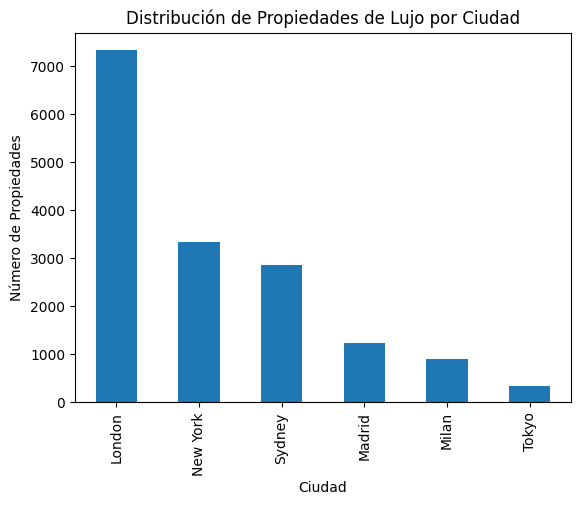

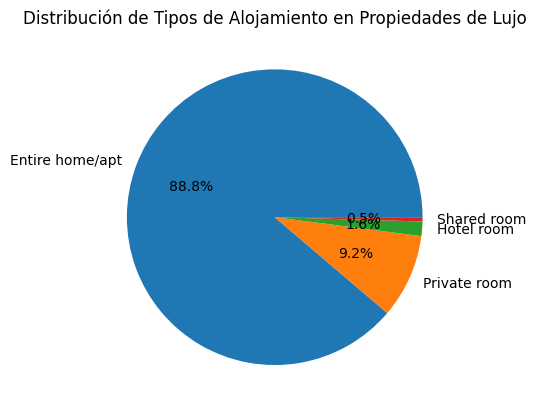

In [71]:
# Estadísticas descriptivas para propiedades de lujo
print("Estadísticas de propiedades de lujo:")
print(df_luxury.describe())

# Distribución por ciudad para propiedades de lujo
luxury_by_city = df_luxury['city'].value_counts()
luxury_by_city.plot(kind='bar', title='Distribución de Propiedades de Lujo por Ciudad')
plt.xlabel("Ciudad")
plt.ylabel("Número de Propiedades")
plt.show()

# Distribución por tipo de habitación para propiedades de lujo
luxury_room_type = df_luxury['room_type'].value_counts()
luxury_room_type.plot(kind='pie', autopct='%1.1f%%', title='Distribución de Tipos de Alojamiento en Propiedades de Lujo')
plt.ylabel("")
plt.show()


## Análisis de las propiedades estándar

Estadísticas de propiedades regulares:
                 id       host_id       latitude      longitude  \
count  2.039480e+05  2.039480e+05  203948.000000  203948.000000   
mean   2.226528e+07  8.434211e+07      32.579853      16.558884   
std    1.176791e+07  8.840428e+07      30.052575      76.209284   
min    2.539000e+03  1.944000e+03     -34.135212     -74.244420   
25%    1.324541e+07  1.416139e+07      40.411700      -3.706480   
50%    2.231889e+07  4.592241e+07      40.789810      -0.123315   
75%    3.124526e+07  1.397891e+08      51.494600       9.202630   
max    5.095505e+07  4.117208e+08      51.681690     151.339811   

               price  minimum_nights  number_of_reviews  reviews_per_month  \
count  203948.000000   203948.000000      203948.000000      203948.000000   
mean      776.267956        5.217668          20.995494           1.162413   
std      3435.741799       19.617220          44.043994           1.421448   
min         1.000000        1.000000         

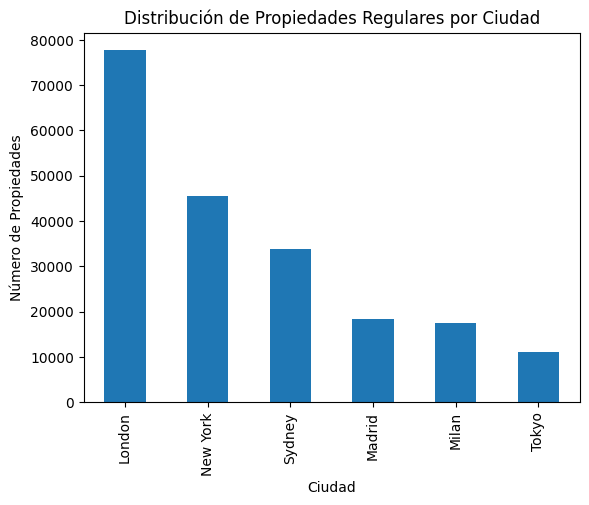

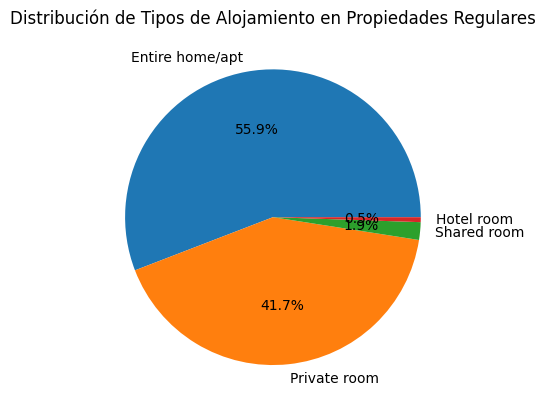

In [63]:
# Estadísticas descriptivas para propiedades regulares
print("Estadísticas de propiedades regulares:")
print(df_regular.describe())

# Distribución por ciudad para propiedades regulares
regular_by_city = df_regular['city'].value_counts()
regular_by_city.plot(kind='bar', title='Distribución de Propiedades Regulares por Ciudad')
plt.xlabel("Ciudad")
plt.ylabel("Número de Propiedades")
plt.show()

# Distribución por tipo de habitación para propiedades regulares
regular_room_type = df_regular['room_type'].value_counts()
regular_room_type.plot(kind='pie', autopct='%1.1f%%', title='Distribución de Tipos de Alojamiento en Propiedades Regulares')
plt.ylabel("")
plt.show()


## Precio promedio por tipo de propiedad de las propiedades regulares

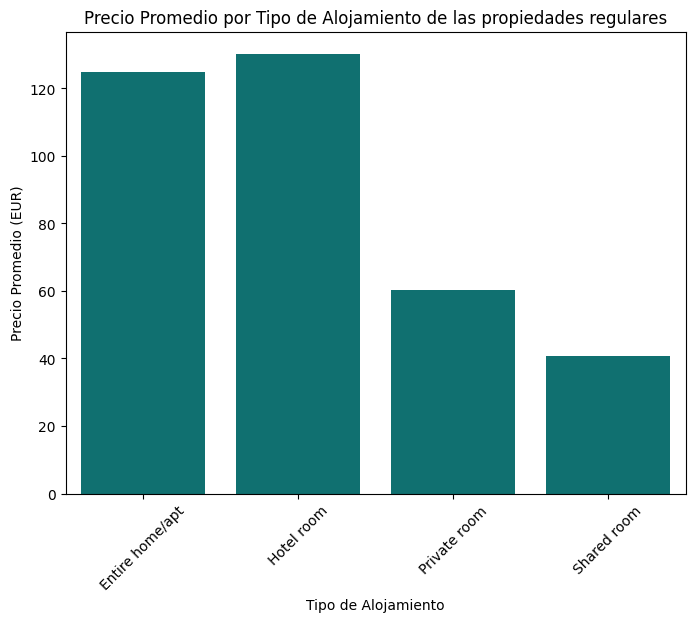

In [72]:
# Calcular el precio promedio para cada tipo de alojamiento
avg_price_room_type = df_regular.groupby('room_type')['price_eur'].mean().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear gráfico de barras
sns.barplot(data=avg_price_room_type, x='room_type', y='price_eur', color='teal')
plt.title("Precio Promedio por Tipo de Alojamiento de las propiedades regulares")
plt.xlabel("Tipo de Alojamiento")
plt.ylabel("Precio Promedio (EUR)")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para facilitar la lectura

plt.show()



## Número de reseñas vs precio para las propiedades estándar (regulares)


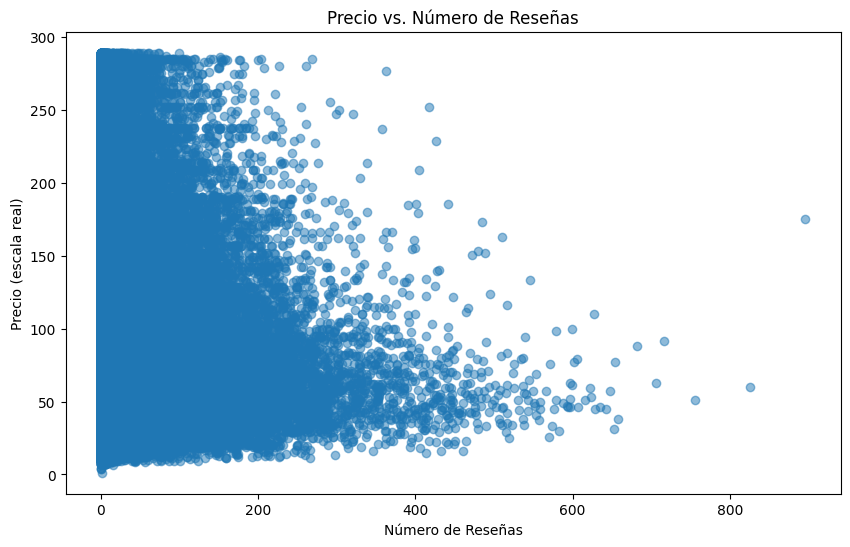

In [73]:

plt.figure(figsize=(10, 6))
plt.scatter(df_regular['number_of_reviews'], df_regular['price_eur'], alpha=0.5)
plt.title('Precio vs. Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio (escala real)')

plt.show()


## Precios promedio de las propiedades estándar por ciudad

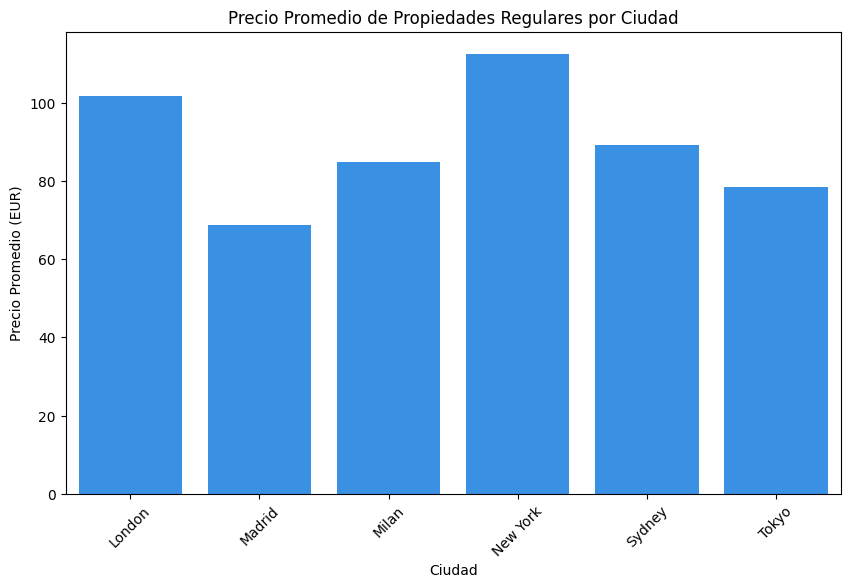

In [122]:
# Calcular el precio promedio de propiedades regulares por ciudad
avg_price_regular_city = df_regular.groupby('city')['price_eur'].mean().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear gráfico de barras
sns.barplot(data=avg_price_regular_city, x='city', y='price_eur', color='dodgerblue')
plt.title("Precio Promedio de Propiedades Regulares por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Precio Promedio (EUR)")
plt.xticks(rotation=45)  # Rotación de etiquetas para facilitar la lectura

plt.show()



## Comparar precios promedios de las propiedades estándar y las propiedades de lujo

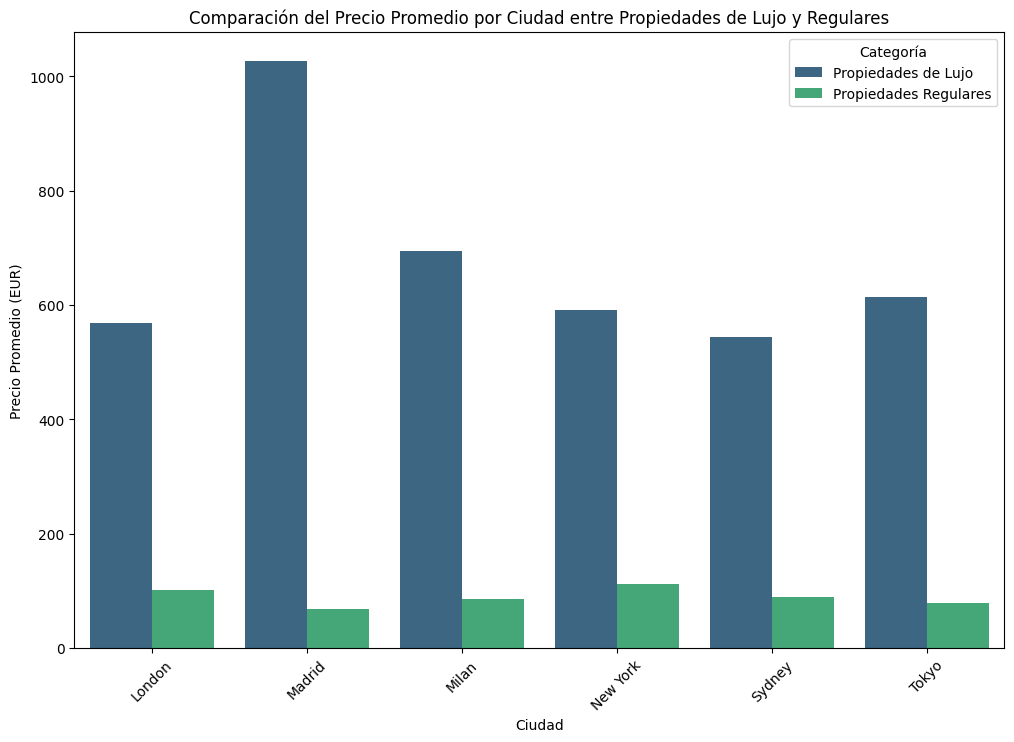

In [125]:
# Calcular el precio promedio por ciudad para propiedades de lujo y regulares
avg_price_luxury_city = df_luxury.groupby('city')['price_eur'].mean().reset_index()
avg_price_luxury_city['Categoría'] = 'Propiedades de Lujo'

avg_price_regular_city = df_regular.groupby('city')['price_eur'].mean().reset_index()
avg_price_regular_city['Categoría'] = 'Propiedades Regulares'

# Concatenar los datos de lujo y regulares
comparison_by_city = pd.concat([avg_price_luxury_city, avg_price_regular_city])

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear gráfico de barras agrupadas
sns.barplot(data=comparison_by_city, x='city', y='price_eur', hue='Categoría', palette='viridis')
plt.title("Comparación del Precio Promedio por Ciudad entre Propiedades de Lujo y Regulares")
plt.xlabel("Ciudad")
plt.ylabel("Precio Promedio (EUR)")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.legend(title='Categoría')
plt.show()



## Precios promedio vs barrio de la ciudad de Londres de propiedades estándar

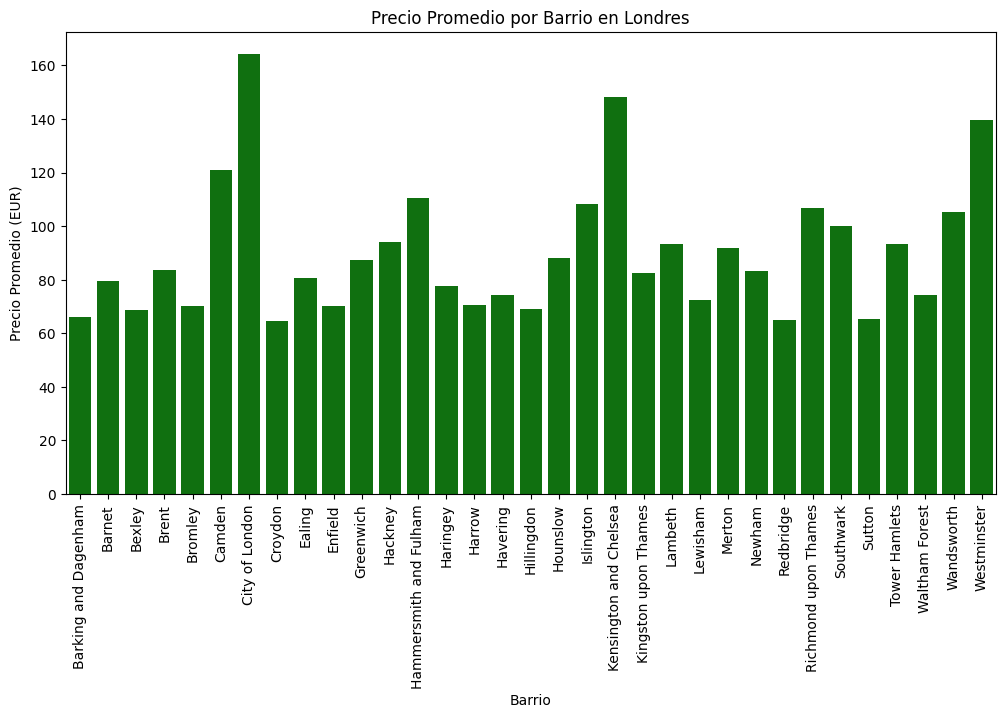

In [126]:
# Filtrar el dataset para obtener solo los datos de Londres
df_london = df_regular[df_regular['city'] == 'London']

# Calcular el precio promedio por barrio en Londres
avg_price_neighbourhood = df_london.groupby('neighbourhood')['price_eur'].mean().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear gráfico de barras
sns.barplot(data=avg_price_neighbourhood, x='neighbourhood', y='price_eur', color='green')
plt.title("Precio Promedio por Barrio en Londres")
plt.xlabel("Barrio")
plt.ylabel("Precio Promedio (EUR)")
plt.xticks(rotation=90)  # Rotar etiquetas del eje X para facilitar la lectura

plt.show()



## Precio promedio vs zona para la ciudad de New York de propiedades estándar

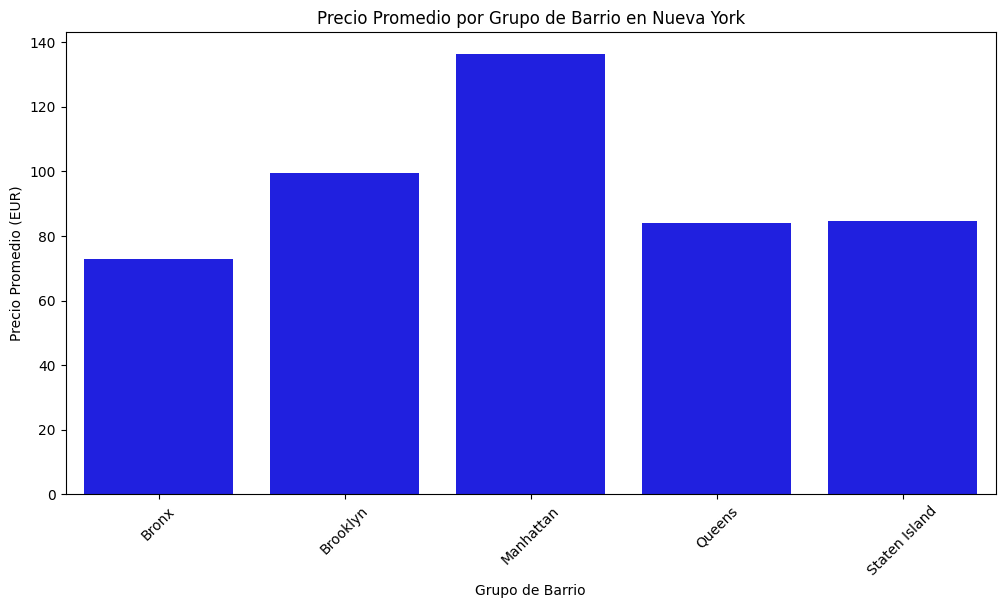

In [127]:
# Filtrar el dataset para obtener solo los datos de Nueva York
df_ny = df_regular[df_regular['city'] == 'New York']

# Calcular el precio promedio por grupo de barrio en Nueva York
avg_price_neighbourhood_group_ny = df_ny.groupby('neighbourhood_group')['price_eur'].mean().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear gráfico de barras
sns.barplot(data=avg_price_neighbourhood_group_ny, x='neighbourhood_group', y='price_eur', color='blue')
plt.title("Precio Promedio por Grupo de Barrio en Nueva York")
plt.xlabel("Grupo de Barrio")
plt.ylabel("Precio Promedio (EUR)")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para facilitar la lectura

plt.show()




## Precio promedio por grupo de barrio en Madrid para propiedades estándar

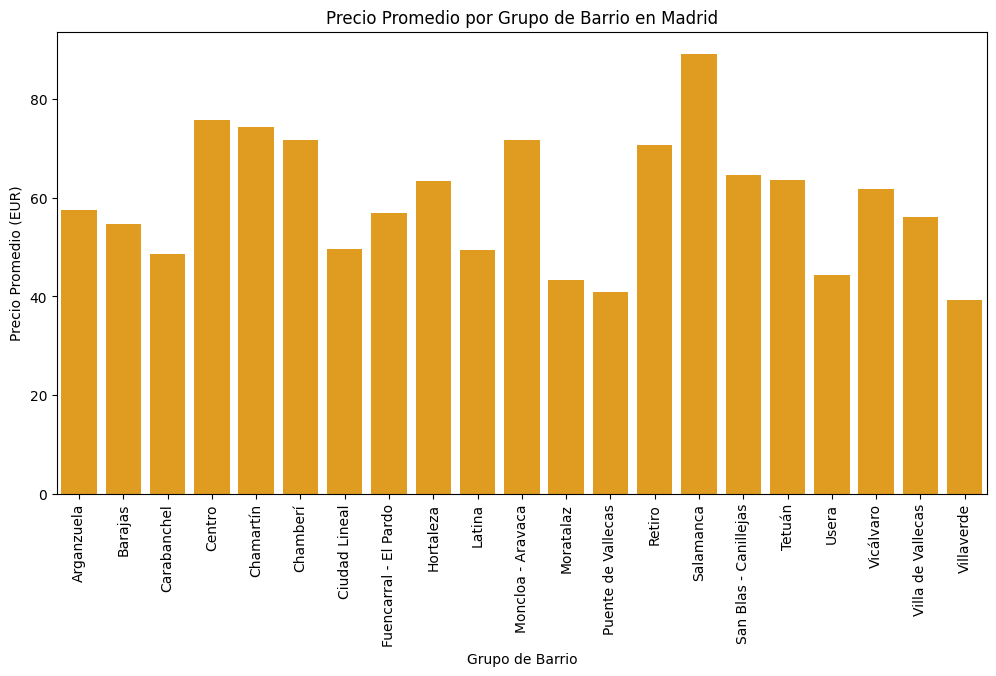

In [128]:
# Filtrar el dataset para obtener solo los datos de Madrid
df_madrid = df_regular[df_regular['city'] == 'Madrid']

# Calcular el precio promedio por grupo de barrio en Madrid
avg_price_neighbourhood_group_madrid = df_madrid.groupby('neighbourhood_group')['price_eur'].mean().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear gráfico de barras
sns.barplot(data=avg_price_neighbourhood_group_madrid, x='neighbourhood_group', y='price_eur', color='orange')
plt.title("Precio Promedio por Grupo de Barrio en Madrid")
plt.xlabel("Grupo de Barrio")
plt.ylabel("Precio Promedio (EUR)")
plt.xticks(rotation=90)  # Rotar etiquetas del eje X para facilitar la lectura

plt.show()



## Precio promedio por barrio en Milán de las propiedades estándar

c:\Users\Administrator\Documents\ProyectoAirBnB\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 133 (\x85) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


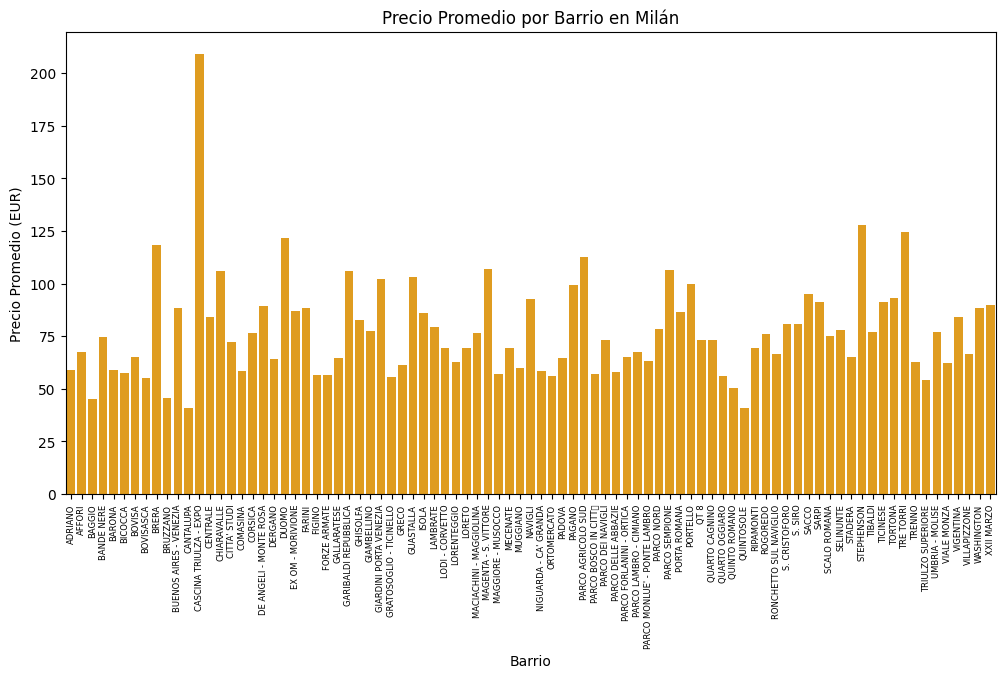

In [130]:
# Filtrar el dataset para obtener solo los datos de Milán
df_milan = df_regular[df_regular['city'] == 'Milan']

# Calcular el precio promedio por barrio en Milán
avg_price_neighbourhood_group_milan = df_milan.groupby('neighbourhood')['price_eur'].mean().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear gráfico de barras
sns.barplot(data=avg_price_neighbourhood_group_milan, x='neighbourhood', y='price_eur', color='orange')
plt.title("Precio Promedio por Barrio en Milán")
plt.xlabel("Barrio")
plt.ylabel("Precio Promedio (EUR)")
plt.xticks(rotation=90, fontsize=6)  # Rotar etiquetas del eje X y reducir aún más el tamaño de la fuente

plt.show()




## Precio promedio por barrio en Tokyo de las propiedades estándar

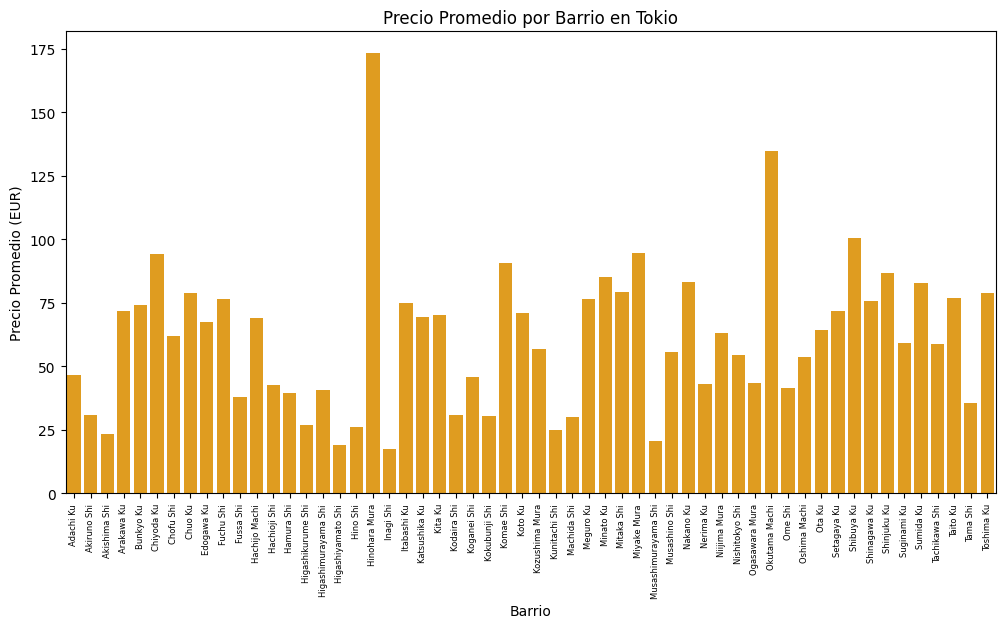

In [131]:
# Filtrar el dataset para obtener solo los datos de Tokio
df_tokyo = df_regular[df_regular['city'] == 'Tokyo']

# Calcular el precio promedio por barrio en Tokio
avg_price_neighbourhood_group_tokyo = df_tokyo.groupby('neighbourhood')['price_eur'].mean().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear gráfico de barras
sns.barplot(data=avg_price_neighbourhood_group_tokyo, x='neighbourhood', y='price_eur', color='orange')
plt.title("Precio Promedio por Barrio en Tokio")
plt.xlabel("Barrio")
plt.ylabel("Precio Promedio (EUR)")
plt.xticks(rotation=90, fontsize=6)  # Rotar etiquetas del eje X y reducir tamaño de la fuente

plt.show()



## Precio promedio por barrio en Sydney de las propiedades estándar

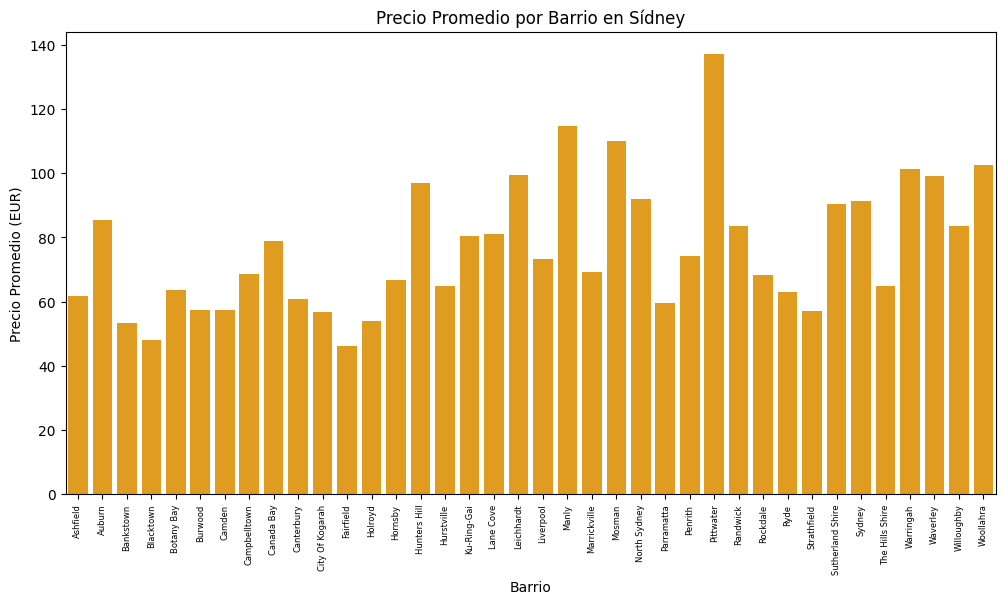

In [132]:
# Filtrar el dataset para obtener solo los datos de Sídney
df_sydney = df_regular[df_regular['city'] == 'Sydney']

# Calcular el precio promedio por barrio en Sídney
avg_price_neighbourhood_group_sydney = df_sydney.groupby('neighbourhood')['price_eur'].mean().reset_index()

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear gráfico de barras
sns.barplot(data=avg_price_neighbourhood_group_sydney, x='neighbourhood', y='price_eur', color='orange')
plt.title("Precio Promedio por Barrio en Sídney")
plt.xlabel("Barrio")
plt.ylabel("Precio Promedio (EUR)")
plt.xticks(rotation=90, fontsize=6)  # Rotar etiquetas del eje X y reducir tamaño de la fuente

plt.show()



## Distribución de propiedades estándar en Londres indicando mediante color el precio

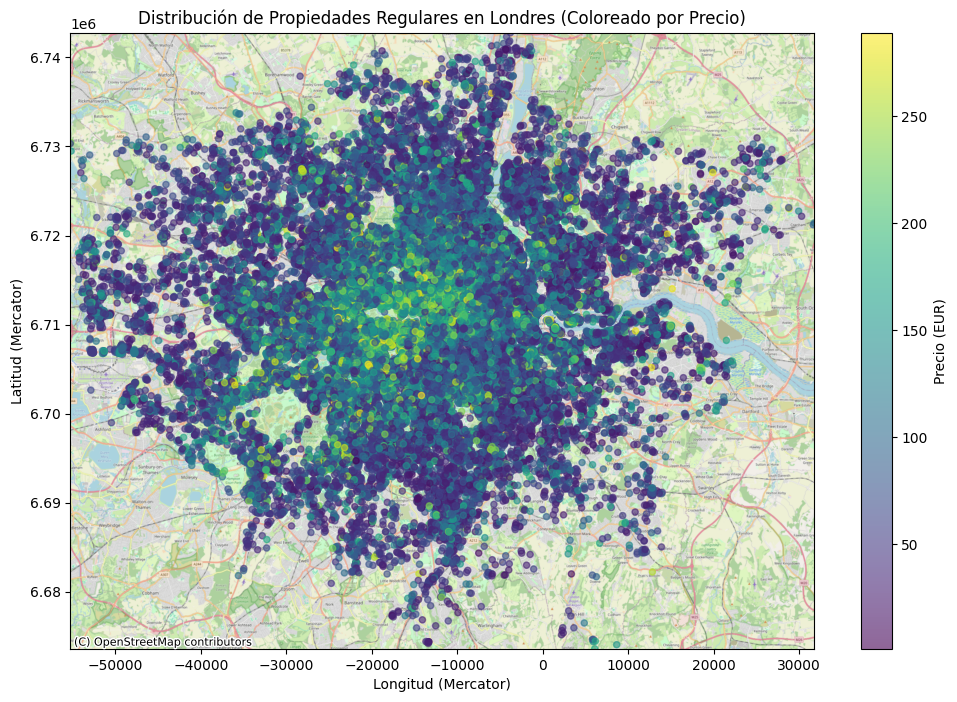

In [133]:

# Filtrar las propiedades regulares en Londres
df_london_regular = df_regular[df_regular['city'] == 'London']

# Convertir el DataFrame a un GeoDataFrame
gdf_london_regular = gpd.GeoDataFrame(
    df_london_regular,
    geometry=gpd.points_from_xy(df_london_regular.longitude, df_london_regular.latitude)
)

# Configurar el sistema de coordenadas a EPSG:4326
gdf_london_regular.crs = 'EPSG:4326'

# Proyectar a EPSG:3857
gdf_london_regular = gdf_london_regular.to_crs(epsg=3857)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el scatter plot
scatter = plt.scatter(
    gdf_london_regular.geometry.x,
    gdf_london_regular.geometry.y,
    c=gdf_london_regular['price_eur'],  # Color según el precio
    cmap='viridis',
    alpha=0.6,
    s=20
)

# Configurar título y etiquetas
plt.title("Distribución de Propiedades Regulares en Londres (Coloreado por Precio)")
plt.xlabel("Longitud (Mercator)")
plt.ylabel("Latitud (Mercator)")

# Agregar el mapa de fondo de Londres
ax = plt.gca()
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Ajustar límites para que el mapa se ajuste a los datos
plt.xlim(gdf_london_regular.geometry.x.min(), gdf_london_regular.geometry.x.max())
plt.ylim(gdf_london_regular.geometry.y.min(), gdf_london_regular.geometry.y.max())

# Mostrar leyenda
plt.colorbar(scatter, label='Precio (EUR)')

plt.show()

 










## Distribución de propiedades estándar en Madrid indicando mediante color el precio

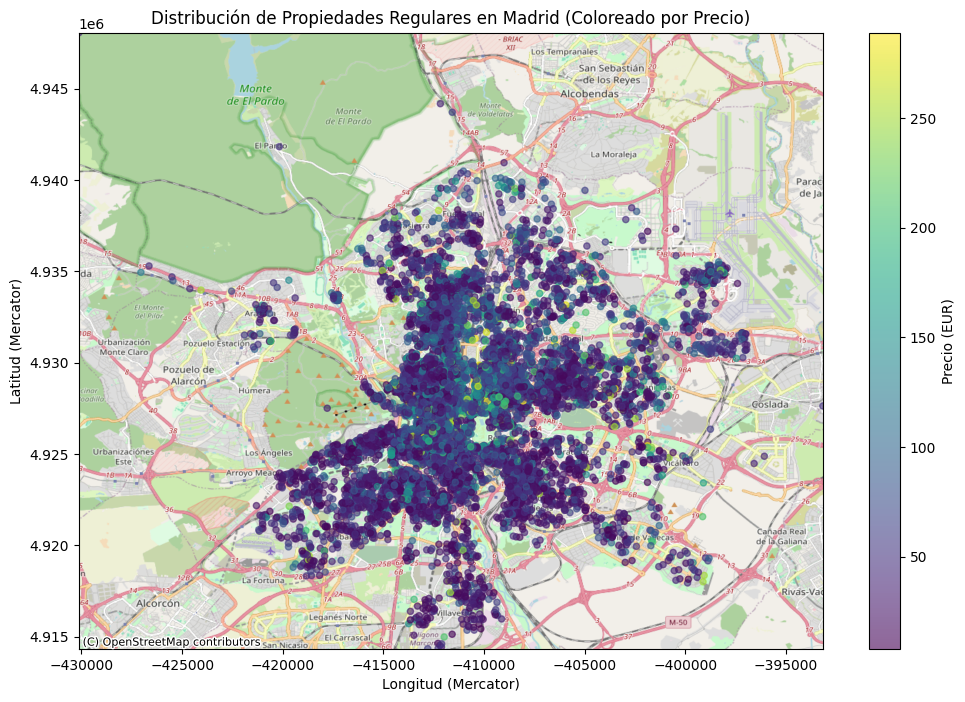

In [134]:
# Filtrar las propiedades regulares en Madrid
df_madrid_regular = df_regular[df_regular['city'] == 'Madrid']

# Convertir el DataFrame a un GeoDataFrame
gdf_madrid_regular = gpd.GeoDataFrame(
    df_madrid_regular,
    geometry=gpd.points_from_xy(df_madrid_regular.longitude, df_madrid_regular.latitude)
)

# Configurar el sistema de coordenadas a EPSG:4326
gdf_madrid_regular.crs = 'EPSG:4326'

# Proyectar a EPSG:3857
gdf_madrid_regular = gdf_madrid_regular.to_crs(epsg=3857)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el scatter plot
scatter = plt.scatter(
    gdf_madrid_regular.geometry.x,
    gdf_madrid_regular.geometry.y,
    c=gdf_madrid_regular['price_eur'],  # Color según el precio
    cmap='viridis',
    alpha=0.6,
    s=20
)

# Configurar título y etiquetas
plt.title("Distribución de Propiedades Regulares en Madrid (Coloreado por Precio)")
plt.xlabel("Longitud (Mercator)")
plt.ylabel("Latitud (Mercator)")

# Agregar el mapa de fondo de Madrid
ax = plt.gca()
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Ajustar límites para que el mapa se ajuste a los datos
plt.xlim(gdf_madrid_regular.geometry.x.min(), gdf_madrid_regular.geometry.x.max())
plt.ylim(gdf_madrid_regular.geometry.y.min(), gdf_madrid_regular.geometry.y.max())

# Mostrar leyenda
plt.colorbar(scatter, label='Precio (EUR)')

plt.show()




## Distribución de propiedades estándar en New York indicando mediante color el precio

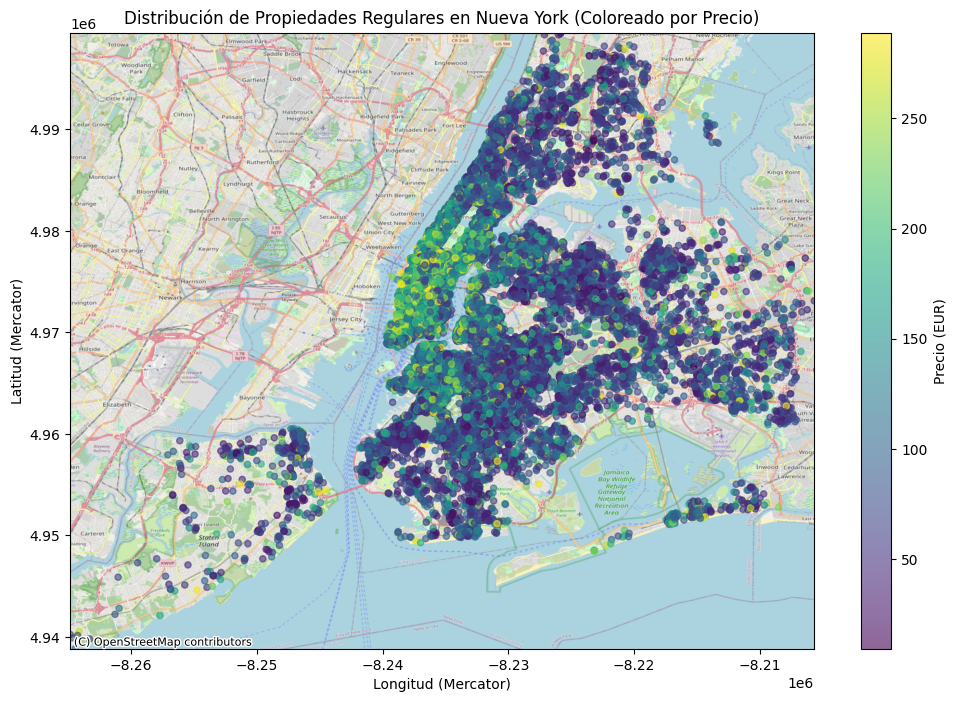

In [135]:
# Filtrar las propiedades regulares en Nueva York
df_ny_regular = df_regular[df_regular['city'] == 'New York']

# Convertir el DataFrame a un GeoDataFrame
gdf_ny_regular = gpd.GeoDataFrame(
    df_ny_regular,
    geometry=gpd.points_from_xy(df_ny_regular.longitude, df_ny_regular.latitude)
)

# Configurar el sistema de coordenadas a EPSG:4326
gdf_ny_regular.crs = 'EPSG:4326'

# Proyectar a EPSG:3857
gdf_ny_regular = gdf_ny_regular.to_crs(epsg=3857)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el scatter plot
scatter = plt.scatter(
    gdf_ny_regular.geometry.x,
    gdf_ny_regular.geometry.y,
    c=gdf_ny_regular['price_eur'],  # Color según el precio
    cmap='viridis',
    alpha=0.6,
    s=20
)

# Configurar título y etiquetas
plt.title("Distribución de Propiedades Regulares en Nueva York (Coloreado por Precio)")
plt.xlabel("Longitud (Mercator)")
plt.ylabel("Latitud (Mercator)")

# Agregar el mapa de fondo de Nueva York
ax = plt.gca()
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Ajustar límites para que el mapa se ajuste a los datos
plt.xlim(gdf_ny_regular.geometry.x.min(), gdf_ny_regular.geometry.x.max())
plt.ylim(gdf_ny_regular.geometry.y.min(), gdf_ny_regular.geometry.y.max())

# Mostrar leyenda
plt.colorbar(scatter, label='Precio (EUR)')

plt.show()


## Distribución de propiedades estándar en Tokyo indicando mediante color el precio

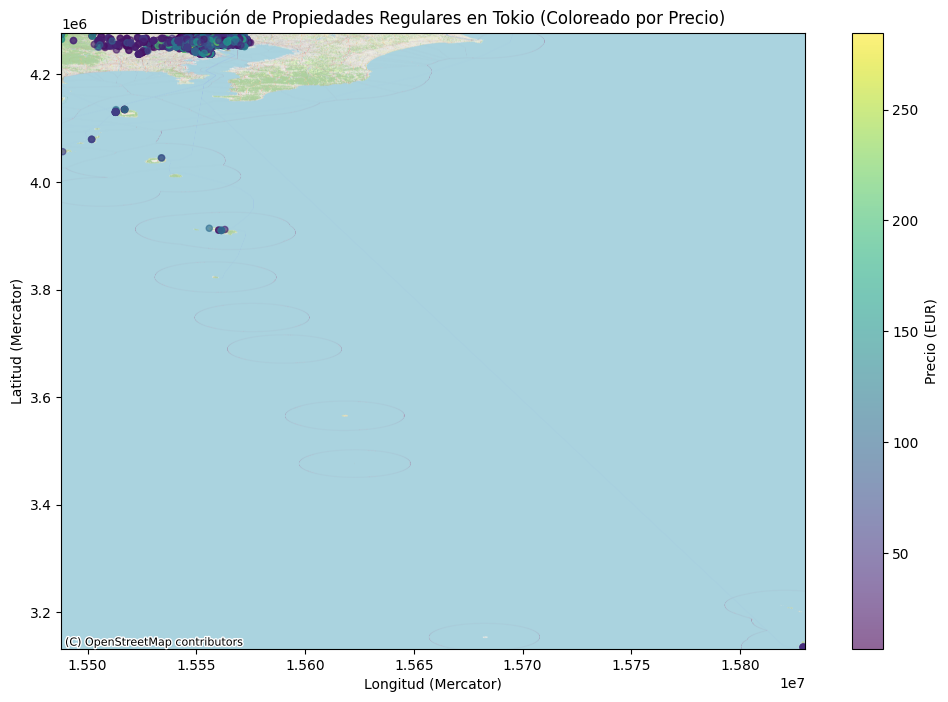

In [136]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Filtrar las propiedades regulares en Tokio
df_tokyo_regular = df_regular[df_regular['city'] == 'Tokyo']

# Convertir el DataFrame a un GeoDataFrame
gdf_tokyo_regular = gpd.GeoDataFrame(
    df_tokyo_regular,
    geometry=gpd.points_from_xy(df_tokyo_regular.longitude, df_tokyo_regular.latitude)
)

# Configurar el sistema de coordenadas a EPSG:4326
gdf_tokyo_regular.crs = 'EPSG:4326'

# Proyectar a EPSG:3857
gdf_tokyo_regular = gdf_tokyo_regular.to_crs(epsg=3857)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el scatter plot
scatter = plt.scatter(
    gdf_tokyo_regular.geometry.x,
    gdf_tokyo_regular.geometry.y,
    c=gdf_tokyo_regular['price_eur'],  # Color según el precio
    cmap='viridis',
    alpha=0.6,
    s=20
)

# Configurar título y etiquetas
plt.title("Distribución de Propiedades Regulares en Tokio (Coloreado por Precio)")
plt.xlabel("Longitud (Mercator)")
plt.ylabel("Latitud (Mercator)")

# Agregar el mapa de fondo de Tokio
ax = plt.gca()
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Ajustar límites para que el mapa se ajuste a los datos
plt.xlim(gdf_tokyo_regular.geometry.x.min(), gdf_tokyo_regular.geometry.x.max())
plt.ylim(gdf_tokyo_regular.geometry.y.min(), gdf_tokyo_regular.geometry.y.max())

# Mostrar leyenda
plt.colorbar(scatter, label='Precio (EUR)')

plt.show()


## Distribución de propiedades estándar en Sydney indicando mediante color el precio

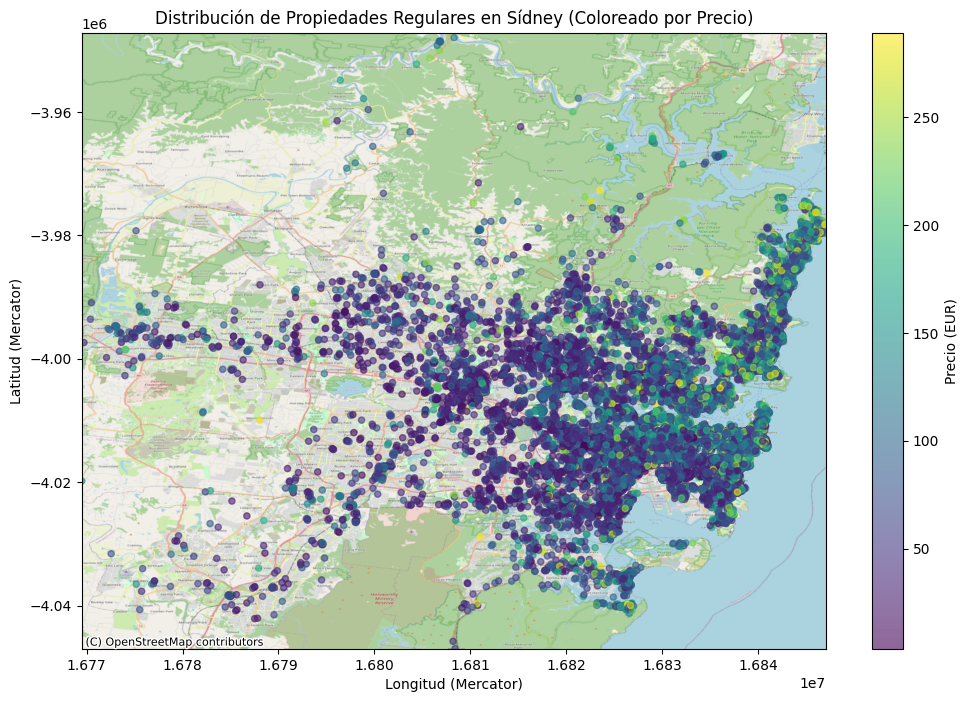

In [87]:
# Filtrar las propiedades regulares en Sídney
df_sydney_regular = df_regular[df_regular['city'] == 'Sydney']

# Convertir el DataFrame a un GeoDataFrame
gdf_sydney_regular = gpd.GeoDataFrame(
    df_sydney_regular,
    geometry=gpd.points_from_xy(df_sydney_regular.longitude, df_sydney_regular.latitude)
)

# Configurar el sistema de coordenadas a EPSG:4326
gdf_sydney_regular.crs = 'EPSG:4326'

# Proyectar a EPSG:3857
gdf_sydney_regular = gdf_sydney_regular.to_crs(epsg=3857)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el scatter plot
scatter = plt.scatter(
    gdf_sydney_regular.geometry.x,
    gdf_sydney_regular.geometry.y,
    c=gdf_sydney_regular['price_eur'],  # Color según el precio
    cmap='viridis',
    alpha=0.6,
    s=20
)

# Configurar título y etiquetas
plt.title("Distribución de Propiedades Regulares en Sídney (Coloreado por Precio)")
plt.xlabel("Longitud (Mercator)")
plt.ylabel("Latitud (Mercator)")

# Agregar el mapa de fondo de Sídney
ax = plt.gca()
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Ajustar límites para que el mapa se ajuste a los datos
plt.xlim(gdf_sydney_regular.geometry.x.min(), gdf_sydney_regular.geometry.x.max())
plt.ylim(gdf_sydney_regular.geometry.y.min(), gdf_sydney_regular.geometry.y.max())

# Mostrar leyenda
plt.colorbar(scatter, label='Precio (EUR)')

plt.show()


## Distribución de propiedades estándar en Milán indicando mediante color el precio

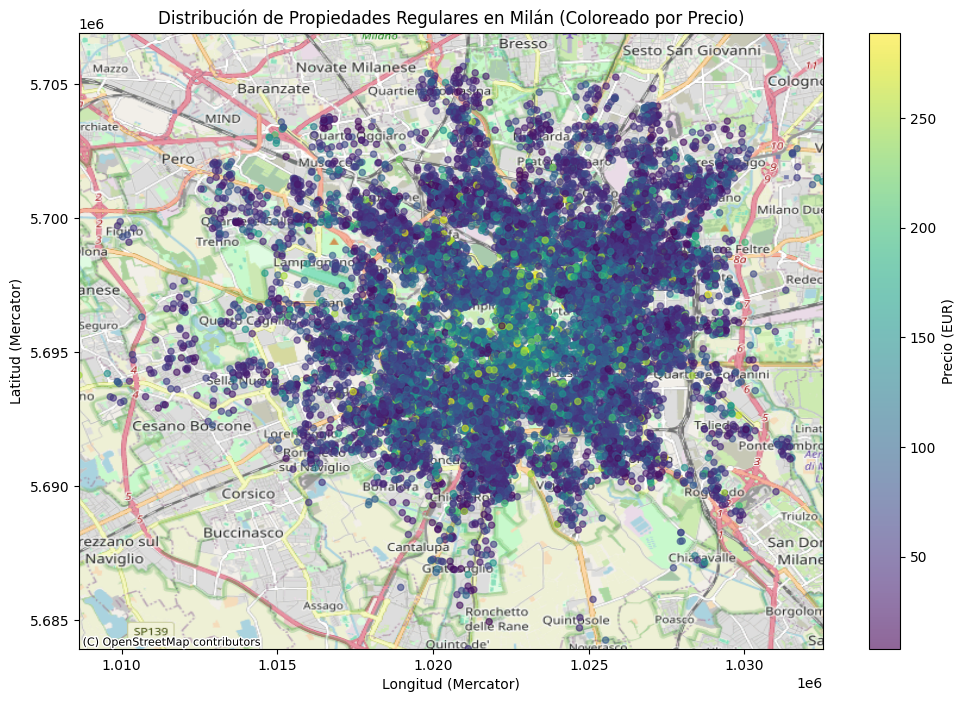

In [88]:
# Filtrar las propiedades regulares en Milán
df_milan_regular = df_regular[df_regular['city'] == 'Milan']

# Convertir el DataFrame a un GeoDataFrame
gdf_milan_regular = gpd.GeoDataFrame(
    df_milan_regular,
    geometry=gpd.points_from_xy(df_milan_regular.longitude, df_milan_regular.latitude)
)

# Configurar el sistema de coordenadas a EPSG:4326
gdf_milan_regular.crs = 'EPSG:4326'

# Proyectar a EPSG:3857
gdf_milan_regular = gdf_milan_regular.to_crs(epsg=3857)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el scatter plot
scatter = plt.scatter(
    gdf_milan_regular.geometry.x,
    gdf_milan_regular.geometry.y,
    c=gdf_milan_regular['price_eur'],  # Color según el precio
    cmap='viridis',
    alpha=0.6,
    s=20
)

# Configurar título y etiquetas
plt.title("Distribución de Propiedades Regulares en Milán (Coloreado por Precio)")
plt.xlabel("Longitud (Mercator)")
plt.ylabel("Latitud (Mercator)")

# Agregar el mapa de fondo de Milán
ax = plt.gca()
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Ajustar límites para que el mapa se ajuste a los datos
plt.xlim(gdf_milan_regular.geometry.x.min(), gdf_milan_regular.geometry.x.max())
plt.ylim(gdf_milan_regular.geometry.y.min(), gdf_milan_regular.geometry.y.max())

# Mostrar leyenda
plt.colorbar(scatter, label='Precio (EUR)')

plt.show()


## Guardar el dataframe df_regular a csv

In [172]:
# Guardar el DataFrame df_regular como archivo CSV
df_regular.to_csv('df_regular2.csv', index=False)
# Guardar el DataFrame df_regular como archivo CSV
df_luxury.to_csv('df_luxury.csv', index=False)
# Guardar el DataFrame df_regular como archivo CSV
df_all.to_csv('df_all.csv', index=False)


## Precio promedio a lo largo del tiempo para las propiedades estándar de todas las ciudades

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\425263531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\425263531.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular['month'] = df_regular['last_review'].dt.to_period('M')


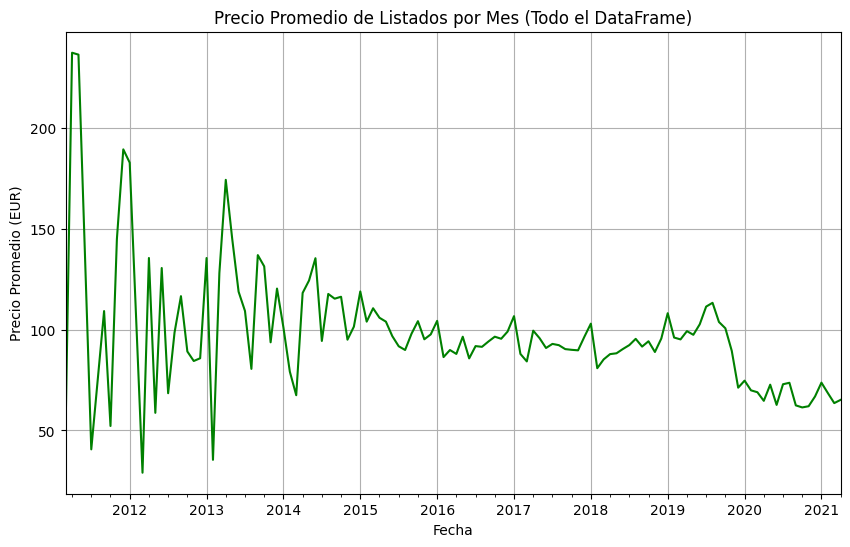

In [166]:
# Convertir la columna 'last_review' a formato datetime
df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')

# Agrupar por mes y calcular el precio promedio para todo el dataframe
df_regular['month'] = df_regular['last_review'].dt.to_period('M')
monthly_price = df_regular.groupby('month')['price_eur'].mean()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
monthly_price.plot(kind='line', color='green')
plt.title('Precio Promedio de Listados por Mes (Todo el DataFrame)')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (EUR)')
plt.grid(True)
plt.show()


## Precio promedio de precios en la ciudad de Londres en el tiempo para propiedades estándar

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\2208135189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\2208135189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_london['month'] = df_london['last_review'].dt.to_period('M')


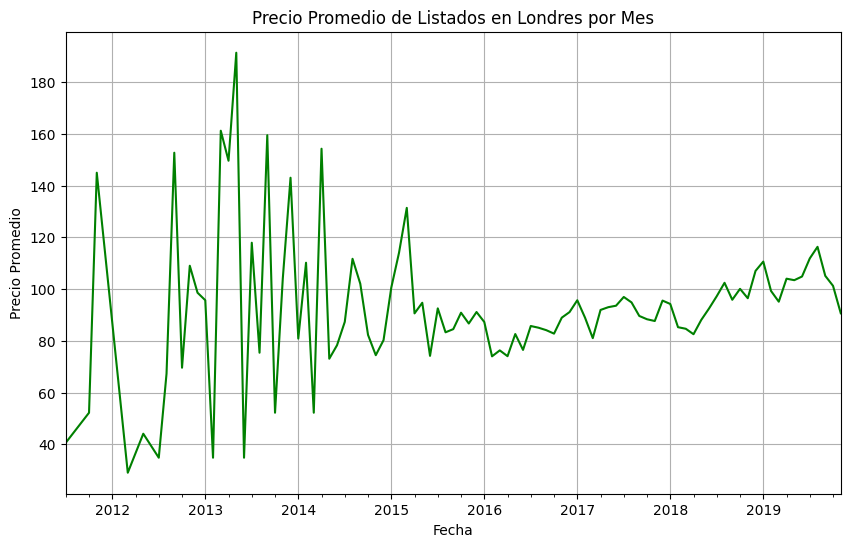

In [145]:
# Convertir la columna 'last_review' a formato datetime
df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')

# Filtrar los datos solo para Londres
df_london = df_regular[df_regular['city'] == 'London']

# Agrupar por mes y calcular el precio promedio
df_london['month'] = df_london['last_review'].dt.to_period('M')
monthly_price = df_london.groupby('month')['price_eur'].mean()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
monthly_price.plot(kind='line', color='green')
plt.title('Precio Promedio de Listados en Londres por Mes')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()




C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\3514678290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\3514678290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_london['month'] = df_london['last_review'].dt.to_period('M')


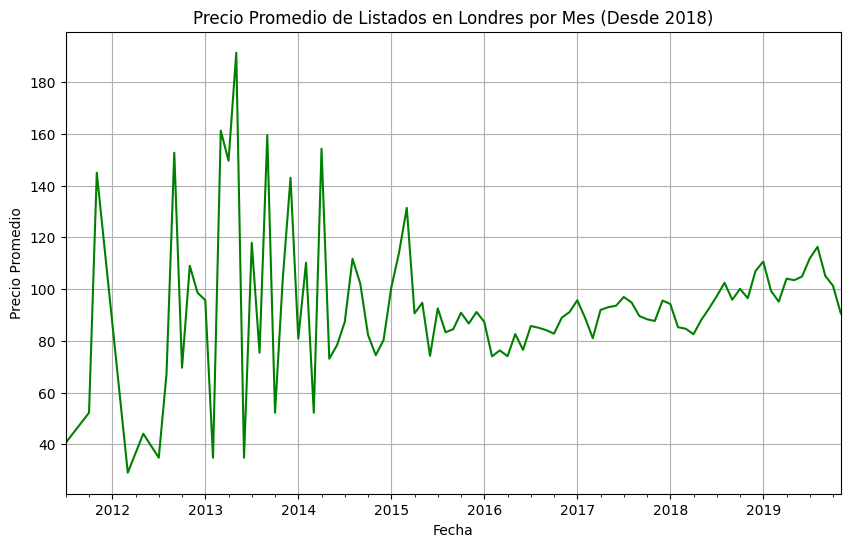

In [170]:
# Convertir la columna 'last_review' a formato datetime
df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')

# Filtrar los datos solo para Londres y desde el 2018
df_london = df_regular[(df_regular['city'] == 'London') & (df_regular['last_review'] >= '2011-01-01')]

# Agrupar por mes y calcular el precio promedio
df_london['month'] = df_london['last_review'].dt.to_period('M')
monthly_price = df_london.groupby('month')['price_eur'].mean()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
monthly_price.plot(kind='line', color='green')
plt.title('Precio Promedio de Listados en Londres por Mes (Desde 2018)')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()


## Promedio de precios en el tiempo para la ciudad de Madrid considerando propiedades estándar desde 2018

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\1096326413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\1096326413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_london['month'] = df_london['last_review'].dt.to_period('M')


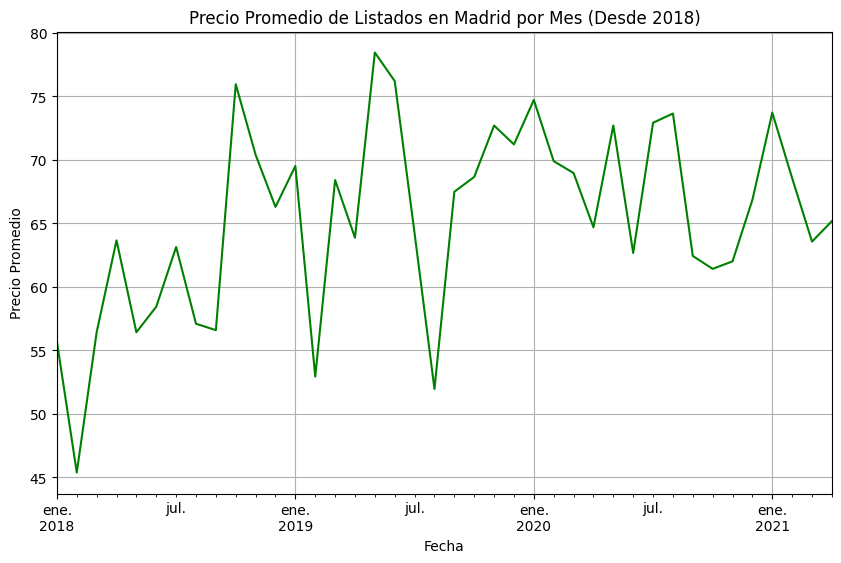

In [147]:
# Convertir la columna 'last_review' a formato datetime
df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')

# Filtrar los datos solo para Londres y desde el 2018
df_london = df_regular[(df_regular['city'] == 'Madrid') & (df_regular['last_review'] >= '2018-01-01')]

# Agrupar por mes y calcular el precio promedio
df_london['month'] = df_london['last_review'].dt.to_period('M')
monthly_price = df_london.groupby('month')['price_eur'].mean()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
monthly_price.plot(kind='line', color='green')
plt.title('Precio Promedio de Listados en Madrid por Mes (Desde 2018)')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()


## Precios promedio a lo largo del tiempo para New York para las propiedades estándar

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\650569846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\650569846.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_london['month'] = df_london['last_review'].dt.to_period('M')


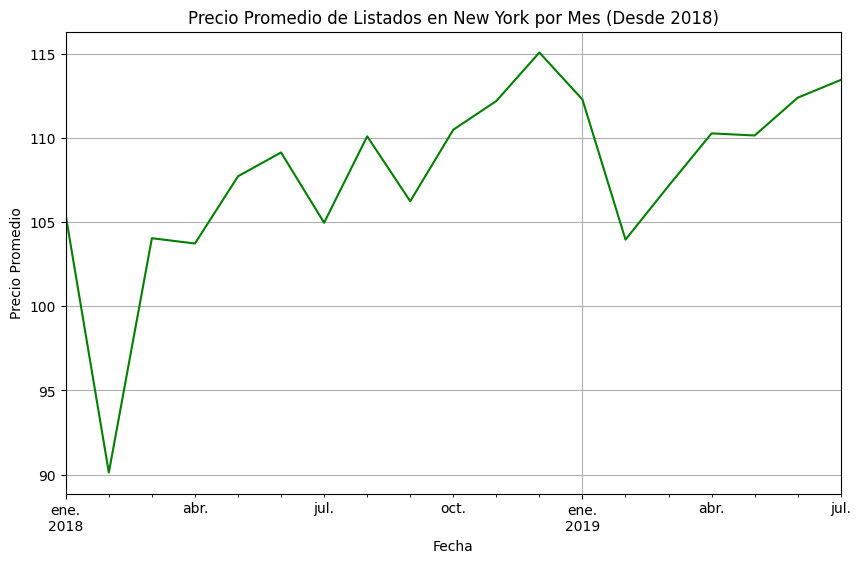

In [148]:
# Convertir la columna 'last_review' a formato datetime
df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')

# Filtrar los datos solo para Londres y desde el 2018
df_london = df_regular[(df_regular['city'] == 'New York') & (df_regular['last_review'] >= '2018-01-01')]

# Agrupar por mes y calcular el precio promedio
df_london['month'] = df_london['last_review'].dt.to_period('M')
monthly_price = df_london.groupby('month')['price_eur'].mean()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
monthly_price.plot(kind='line', color='green')
plt.title('Precio Promedio de Listados en New York por Mes (Desde 2018)')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()


## Precios promedio a lo largo del tiempo de la ciudad de Tokio para las propiedades estándar

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\4087716556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\4087716556.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_london['month'] = df_london['last_review'].dt.to_period('M')


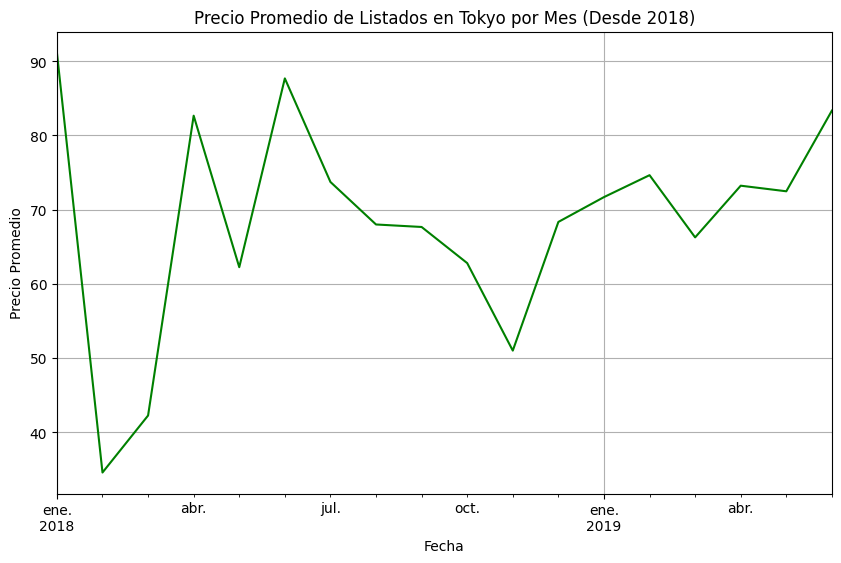

In [169]:
# Convertir la columna 'last_review' a formato datetime
df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')

# Filtrar los datos solo para Londres y desde el 2018
df_london = df_regular[(df_regular['city'] == 'Tokyo') & (df_regular['last_review'] >= '2018-01-01')]

# Agrupar por mes y calcular el precio promedio
df_london['month'] = df_london['last_review'].dt.to_period('M')
monthly_price = df_london.groupby('month')['price_eur'].mean()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
monthly_price.plot(kind='line', color='green')
plt.title('Precio Promedio de Listados en Tokyo por Mes (Desde 2018)')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()


## Precio promedio a lo largo del tiempo para la ciudad de Milán para las propiedades estándar

In [159]:
# Convertir la columna 'last_review' a formato datetime
df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')

# Filtrar los datos solo para Milán y desde el 2018
df_milan = df_regular[(df_regular['city'] == 'Milan') & (df_regular['last_review'] >= '2011-01-01')]

# Comprobar si hay datos después del filtrado
if df_milan.empty:
    print("No hay datos disponibles para Milán desde 2011.")
else:
    # Agrupar por mes y calcular el precio promedio
    df_milan['month'] = df_milan['last_review'].dt.to_period('M')
    monthly_price = df_milan.groupby('month')['price_eur'].mean()

    # Crear el gráfico de línea
    plt.figure(figsize=(10, 6))
    monthly_price.plot(kind='line', color='green')
    plt.title('Precio Promedio de Listados en Milán por Mes (Desde 2018)')
    plt.xlabel('Fecha')
    plt.ylabel('Precio Promedio')
    plt.grid(True)
    plt.show()



No hay datos disponibles para Milán desde 2011.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\3494670217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')


## Precios promedio a lo largo del tiempo para la ciudad de Sydney para las propiedades estándar 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\232025322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\232025322.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_milan['month'] = df_milan['last_review'].dt.to_period('M')


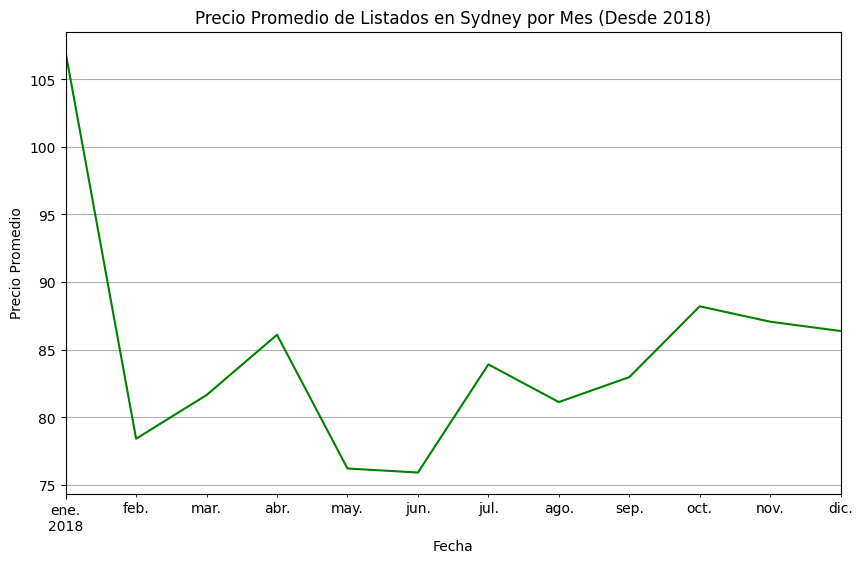

In [160]:
# Convertir la columna 'last_review' a formato datetime
df_regular['last_review'] = pd.to_datetime(df_regular['last_review'], errors='coerce')

# Filtrar los datos solo para Milán y desde el 2018
df_milan = df_regular[(df_regular['city'] == 'Sydney') & (df_regular['last_review'] >= '2018-01-01')]

# Comprobar si hay datos después del filtrado
if df_milan.empty:
    print("No hay datos disponibles para Milán desde 2018.")
else:
    # Agrupar por mes y calcular el precio promedio
    df_milan['month'] = df_milan['last_review'].dt.to_period('M')
    monthly_price = df_milan.groupby('month')['price_eur'].mean()

    # Crear el gráfico de línea
    plt.figure(figsize=(10, 6))
    monthly_price.plot(kind='line', color='green')
    plt.title('Precio Promedio de Listados en Sydney por Mes (Desde 2018)')
    plt.xlabel('Fecha')
    plt.ylabel('Precio Promedio')
    plt.grid(True)
    plt.show()
